In [3]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import quandl

In [5]:
quandl.ApiConfig.api_key = 'gYL2PmF7subS5YaKyJuj'

In [6]:
swap_names = ['FRED/DSWP1', 
             'FRED/DSWP2', 
             'FRED/DSWP3', 
             'FRED/DSWP4', 
             'FRED/DSWP5', 
             'FRED/DSWP7', 
             'FRED/DSWP10', 
             'FRED/DSWP30']

swap_df = quandl.get(swap_names)
swap_df = swap_df.dropna()
swap_df.columns = ["SWAP1",
                  "SWAP2",
                  "SWAP3",
                  "SWAP4",
                  "SWAP5",
                  "SWAP7",
                  "SWAP10",
                  "SWAP30"]

In [7]:
swap_df.head(4100)

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19
...,...,...,...,...,...,...,...,...
2016-10-24,0.99,1.08,1.15,1.22,1.30,1.43,1.61,1.96
2016-10-25,1.00,1.08,1.15,1.22,1.29,1.42,1.59,1.93
2016-10-26,1.01,1.10,1.18,1.25,1.33,1.47,1.64,1.98


In [8]:
swap_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4078 entries, 2000-07-03 to 2016-10-28
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SWAP1   4078 non-null   float64
 1   SWAP2   4078 non-null   float64
 2   SWAP3   4078 non-null   float64
 3   SWAP4   4078 non-null   float64
 4   SWAP5   4078 non-null   float64
 5   SWAP7   4078 non-null   float64
 6   SWAP10  4078 non-null   float64
 7   SWAP30  4078 non-null   float64
dtypes: float64(8)
memory usage: 286.7 KB


In [9]:
swap_df2 = swap_df.copy()

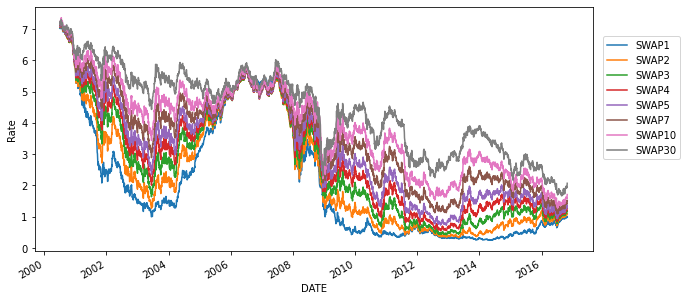

In [10]:
swap_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

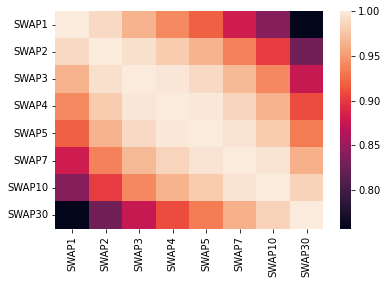

In [11]:
sns.heatmap(swap_df.corr())
plt.show()

In [12]:
from sklearn.decomposition import PCA

In [66]:
pca = PCA(n_components=3)
pca.fit(swap_df)

PCA(n_components=3)

In [67]:
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None, svd_solver='auto', tol=0.0, whiten=False)



PCA(n_components=3)

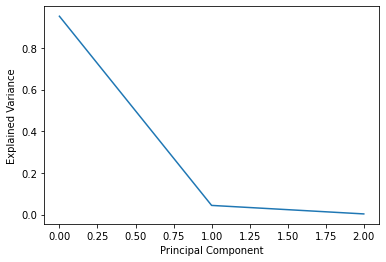

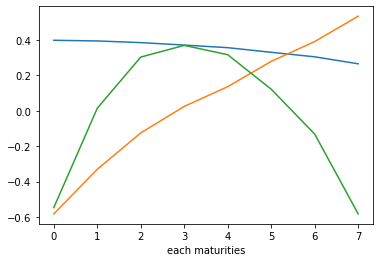

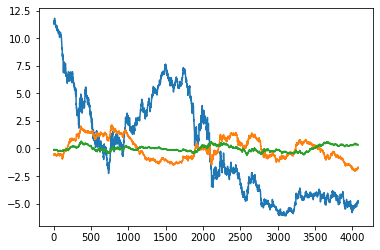

In [72]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance")
plt.show()

plt.plot(pca.components_[0:3].T)
plt.xlabel('each maturities')
plt.show()

vals = pca.transform(swap_df)
plt.plot(vals[:,0:3])
plt.show()

In [77]:
vals

array([[11.57676897, -0.54412097, -0.13881969],
       [11.32026668, -0.57937659, -0.14891981],
       [11.51002975, -0.54535244, -0.12227898],
       ...,
       [-4.82226163, -1.7785298 ,  0.35708705],
       [-4.7168679 , -1.67853872,  0.34506256],
       [-4.73880957, -1.67973761,  0.33063939]])

In [16]:
treasury = ['FRED/DGS1MO',
           'FRED/DGS3MO',
           'FRED/DGS6MO',
           'FRED/DGS1',
           'FRED/DGS2',
           'FRED/DGS3',
           'FRED/DGS5',
           'FRED/DGS7',
           'FRED/DGS10',
           'FRED/DGS20',
           'FRED/DGS30']

treasury_df = quandl.get(treasury)
treasury_df.columns = ['TRESY1mo',
                    'TRESY3mo', 
                    'TRESY6mo',
                    'TRESY1y',
                    'TRESY2y',
                    'TRESY3y',
                    'TRESY5y',
                    'TRESY7y',
                    'TRESY10y',
                    'TRESY20y',
                    'TRESY30y']

In [20]:
treasury_df.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,3.22,NaN,3.70,3.88,NaN,4.06,4.07,NaN
1962-01-03,NaN,NaN,NaN,3.24,NaN,3.70,3.87,NaN,4.03,4.07,NaN
1962-01-04,NaN,NaN,NaN,3.24,NaN,3.69,3.86,NaN,3.99,4.06,NaN
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN


In [29]:
treasury_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15120 entries, 1962-01-02 to 2022-07-15
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TRESY1mo  5242 non-null   float64
 1   TRESY3mo  10218 non-null  float64
 2   TRESY6mo  10218 non-null  float64
 3   TRESY1y   15120 non-null  float64
 4   TRESY2y   11528 non-null  float64
 5   TRESY3y   15120 non-null  float64
 6   TRESY5y   15120 non-null  float64
 7   TRESY7y   13250 non-null  float64
 8   TRESY10y  15120 non-null  float64
 9   TRESY20y  13431 non-null  float64
 10  TRESY30y  11350 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


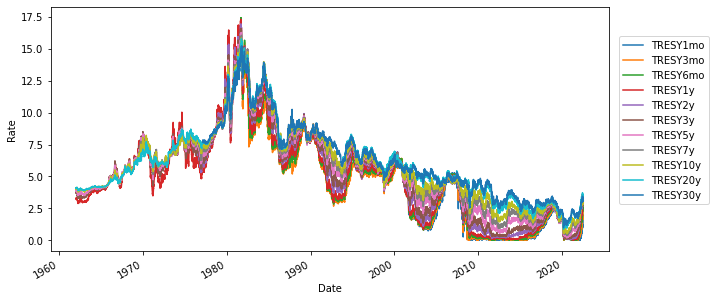

In [17]:
treasury_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01,.9), loc=2)
plt.show()

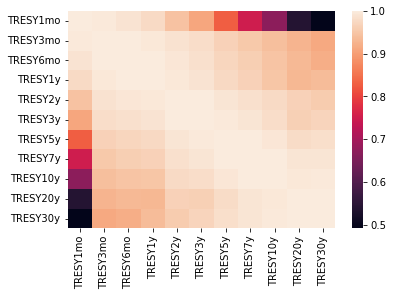

In [18]:
sns.heatmap(treasury_df.corr())
plt.show()

In [30]:
Test = treasury_df[3:-2]
Test.head()

,TRESY1mo,TRESY3mo,TRESY6mo,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,TRESY20y,TRESY30y
Date,,,,,,,,,,,
1962-01-05,NaN,NaN,NaN,3.26,NaN,3.71,3.89,NaN,4.02,4.07,NaN
1962-01-08,NaN,NaN,NaN,3.31,NaN,3.71,3.91,NaN,4.03,4.08,NaN
1962-01-09,NaN,NaN,NaN,3.32,NaN,3.74,3.93,NaN,4.05,4.08,NaN
1962-01-10,NaN,NaN,NaN,3.33,NaN,3.75,3.94,NaN,4.07,4.09,NaN
1962-01-11,NaN,NaN,NaN,3.33,NaN,3.77,3.94,NaN,4.08,4.08,NaN


In [35]:
treasury_df2 = pd.DataFrame(treasury_df[['TRESY1y','TRESY2y','TRESY3y','TRESY5y','TRESY7y','TRESY10y']])
treasury_df2 = treasury_df2.dropna()
comb_df = treasury_df2.merge(swap_df2, left_index=True, right_index=True)

In [36]:
treasury_df2.head()

,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y
Date,,,,,,
1976-06-01,6.70,7.26,7.47,7.71,7.84,7.94
1976-06-02,6.72,7.23,7.48,7.74,7.85,7.94
1976-06-03,6.73,7.22,7.48,7.75,7.86,7.92
1976-06-04,6.60,7.12,7.38,7.67,7.81,7.89
1976-06-07,6.51,7.09,7.35,7.64,7.79,7.88


In [56]:
comb_df.head()

,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
2000-07-03,6.07,6.31,6.24,6.12,6.19,6.00,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,6.06,6.29,6.23,6.12,6.18,5.99,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,6.10,6.34,6.28,6.16,6.24,6.05,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,6.07,6.29,6.23,6.11,6.17,6.01,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,6.09,6.31,6.24,6.13,6.21,6.04,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19


In [37]:
pca_t = PCA(n_components=6)
pca_t.fit(treasury_df2)

PCA(n_components=6)

In [38]:
PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=6)

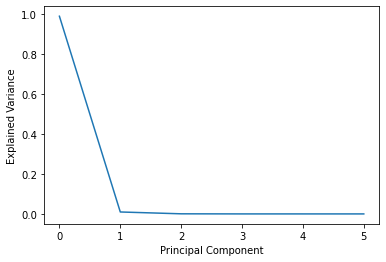

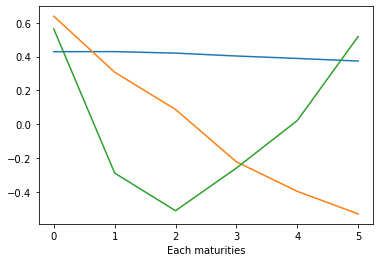

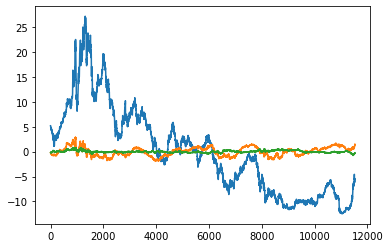

In [71]:
plt.plot(pca_t.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.show()

plt.plot(pca_t.components_[0:3].T)
plt.xlabel('Each maturities')
plt.show()

vals_t = pca_t.transform(treasury_df2)
plt.plot(vals_t[:,0:3])
plt.show()

In [78]:
vals_t

array([[ 5.19958734e+00, -2.25297504e-01, -1.89599583e-01,
        -3.84065625e-02,  2.56623696e-02,  1.84003792e-02],
       [ 5.21549648e+00, -2.31532774e-01, -1.82348272e-01,
         6.49374831e-04,  4.63494062e-02,  8.29496231e-03],
       [ 5.21594593e+00, -2.23803918e-01, -1.86584242e-01,
         2.65922487e-02,  4.17593130e-02,  3.00178960e-03],
       ...,
       [-5.55192390e+00,  1.53520009e+00, -2.44563853e-01,
         5.52596562e-02,  2.44095671e-02, -3.01605552e-02],
       [-5.50207666e+00,  1.45582176e+00, -2.72087666e-01,
         4.30610040e-02,  1.44016594e-02, -1.97775456e-02],
       [-5.55928854e+00,  1.44846966e+00, -2.92011910e-01,
         4.81244428e-02,  1.35355808e-02, -1.27501783e-02]])

In [57]:
pd.DataFrame(pca_t.components_,
             columns=['TRESY1y','TRESY2y','TRESY3y','TRESY5y','TRESY7y','TRESY10y'],
             index=[f'PC{i+1}' for i in range(pca_t.n_components_)])

,TRESY1y,TRESY2y,TRESY3y,TRESY5y,TRESY7y,TRESY10y
PC1,0.429207,0.429504,0.420833,0.403634,0.389276,0.373834
PC2,0.638965,0.307691,0.087177,-0.222686,-0.397501,-0.530899
PC3,0.563300,-0.288941,-0.511943,-0.259308,0.021572,0.519052
PC4,0.267999,-0.506842,-0.171548,0.570569,0.308911,-0.469983
PC5,0.068844,-0.400355,0.392246,0.343354,-0.692357,0.289603
PC6,-0.116770,0.469247,-0.608218,0.526127,-0.339424,0.065002


In [79]:
pd.options.display.float_format = '{:.4f}'.format
pd.DataFrame(vals_t, columns=[f'PC{i+1}' for i in range(pca_t.n_components_)])

,PC1,PC2,PC3,PC4,PC5,PC6
0,5.1996,-0.2253,-0.1896,-0.0384,0.0257,0.0184
1,5.2155,-0.2315,-0.1823,0.0006,0.0463,0.0083
2,5.2159,-0.2238,-0.1866,0.0266,0.0418,0.0030
3,5.0121,-0.2927,-0.1756,0.0126,0.0321,0.0050
4,4.9244,-0.3422,-0.2001,-0.0098,0.0268,0.0100
...,...,...,...,...,...,...
11523,-5.6364,1.2860,-0.3018,0.0280,0.0042,0.0007
11524,-5.6659,1.3806,-0.2299,0.0543,0.0315,-0.0236
11525,-5.5519,1.5352,-0.2446,0.0553,0.0244,-0.0302
11526,-5.5021,1.4558,-0.2721,0.0431,0.0144,-0.0198


In [81]:
usyield_df = quandl.get('USTREASURY/YIELD')

In [82]:
usyield_df.head()

,1 MO,2 MO,3 MO,6 MO,1 YR,2 YR,3 YR,5 YR,7 YR,10 YR,20 YR,30 YR
Date,,,,,,,,,,,,
1990-01-02,NaN,NaN,7.8300,7.8900,7.8100,7.8700,7.9000,7.8700,7.9800,7.9400,NaN,8.0000
1990-01-03,NaN,NaN,7.8900,7.9400,7.8500,7.9400,7.9600,7.9200,8.0400,7.9900,NaN,8.0400
1990-01-04,NaN,NaN,7.8400,7.9000,7.8200,7.9200,7.9300,7.9100,8.0200,7.9800,NaN,8.0400
1990-01-05,NaN,NaN,7.7900,7.8500,7.7900,7.9000,7.9400,7.9200,8.0300,7.9900,NaN,8.0600
1990-01-08,NaN,NaN,7.7900,7.8800,7.8100,7.9000,7.9500,7.9200,8.0500,8.0200,NaN,8.0900
